# Features analysis

In this script, we visually analyze the collected features

To run this script, the following datafiles are needed:
- dt_final.xlsx (attached)

In [1]:
# data
import pandas as pd
import numpy as np
import csv

# misc
import os
import re
import time
import ast
import warnings
import math
import copy
import matplotlib.pyplot as plt
import seaborn as sn


# from newsplease import NewsPlease

# nlp
# from nltk.tokenize import sent_tokenize, word_tokenize
# import nltk
# nltk.download('punkt')
# nltk.download('sentiwordnet')
# nltk.download('wordnet')
# from nltk.corpus import sentiwordnet as swn
# import stanza
# #stanza.download('en') # download English model
# #nlp = stanza.Pipeline('en') # initialize English neural pipeline optional : processors='tokenize, pos'
# import spacy
# nlp_spacy_core_web_sm = spacy.load("en_core_web_sm")
# nlp_spacy_core_web_lg = spacy.load("en_core_web_lg")
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.preprocessing import OneHotEncoder

# statistics
# import statistics
# import statsmodels
# from statsmodels.stats import inter_rater
# import krippendorff
# from scipy import spatial

In [2]:
os.chdir('C:/Users/shiva/Desktop/Master_Thesis/final-data')
feats = pd.read_csv("dt_final_new_features.csv")

C:\Users\shiva\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (3,4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# feats(label4).shape
# len('label4')
feats['label4'].value_counts(sort=True)

0    62501
1     4384
Name: label4, dtype: int64

In [36]:
display(feats)

,Unnamed: 0,sentence,outlet,topic,type,num_sent,article,Bias_words,text,text_low,...,ne_NORP_context,ne_ORDINAL_context,ne_ORG_context,ne_PERCENT_context,ne_PERSON_context,ne_PRODUCT_context,ne_QUANTITY_context,ne_TIME_context,ne_WORK_OF_ART_context,ne_LANGUAGE_context
0,2,"In the Trumpian pandemic moment, gun purchases...",Alternet,gun control,left,1,"In the Trumpian pandemic moment, gun purchases...",['soared'],Trumpian,trumpian,...,0,0,0,0,0,0,0,0,0,0
1,3,"In the Trumpian pandemic moment, gun purchases...",Alternet,gun control,left,1,"In the Trumpian pandemic moment, gun purchases...",['soared'],pandemic,pandemic,...,1,0,0,0,0,0,0,0,0,0
2,4,"In the Trumpian pandemic moment, gun purchases...",Alternet,gun control,left,1,"In the Trumpian pandemic moment, gun purchases...",['soared'],moment,moment,...,1,0,0,0,0,0,0,0,0,0
3,5,"In the Trumpian pandemic moment, gun purchases...",Alternet,gun control,left,1,"In the Trumpian pandemic moment, gun purchases...",['soared'],gun,gun,...,0,0,0,0,0,0,0,0,0,0
4,6,"In the Trumpian pandemic moment, gun purchases...",Alternet,gun control,left,1,"In the Trumpian pandemic moment, gun purchases...",['soared'],purchases,purchases,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66880,111196,Can the loyalty of Trump voters withstand raci...,federalist,trump-presidency,right,4,Can the loyalty of Trump voters withstand raci...,"['racial', 'tensions']",police,police,...,0,0,0,0,0,0,0,0,0,0
66881,111197,Can the loyalty of Trump voters withstand raci...,federalist,trump-presidency,right,4,Can the loyalty of Trump voters withstand raci...,"['racial', 'tensions']",chief,chief,...,0,0,0,0,0,0,0,0,0,0
66882,111198,Can the loyalty of Trump voters withstand raci...,federalist,trump-presidency,right,4,Can the loyalty of Trump voters withstand raci...,"['racial', 'tensions']",broadcast,broadcast,...,0,0,0,0,0,0,0,0,0,0
66883,111201,Can the loyalty of Trump voters withstand raci...,federalist,trump-presidency,right,4,Can the loyalty of Trump voters withstand raci...,"['racial', 'tensions']",Facebook,facebook,...,0,0,0,0,0,0,0,0,1,0


In [4]:
list(feats)

['Unnamed: 0',
 'sentence',
 'outlet',
 'topic',
 'type',
 'num_sent',
 'article',
 'Bias_words',
 'text',
 'text_low',
 'pos',
 'lemma',
 'lemma_low',
 'tag',
 'dep',
 'is_stop',
 'glove_vec300_norm',
 'order',
 'tfidf_art',
 'label4',
 'is_ne',
 'ne_label',
 'negative_conc',
 'positive_conc',
 'weak_subj',
 'strong_subj',
 'MRCP_concretness_ratings',
 'MRCP_Imagability_ratings',
 'hyperbolic_terms',
 'attitude_markers',
 'kill_verbs',
 'bias_lexicon',
 'action_verbs',
 'comparative_forms',
 'modal_adverbs',
 'manner_adverbs',
 'superlative_forms',
 'assertive_verbs',
 'factive_verbs',
 'report_verbs',
 'implicative_verbs',
 'hedges',
 'boosters',
 'affect ',
 'posemo ',
 'negemo ',
 'anx ',
 'anger ',
 'sad ',
 'social ',
 'family ',
 'friend ',
 'female ',
 'male ',
 'cogproc ',
 'insight ',
 'cause ',
 'discrep ',
 'tentat ',
 'certain ',
 'differ ',
 'percept ',
 'see ',
 'hear ',
 'feel ',
 'bio ',
 'body ',
 'health ',
 'sexual ',
 'ingest ',
 'drives ',
 'affiliation ',
 'achie

In [38]:
feats.shape

(66885, 312)

C:\Users\shiva\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\shiva\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


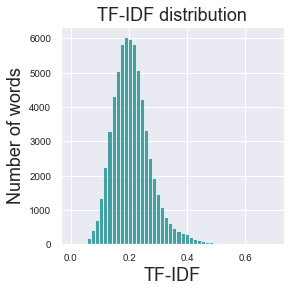

In [39]:
fig, ax = plt.subplots(1, 1, figsize=(4,4))

n, bins, patches = plt.hist(feats['tfidf_art'], 50, density=False, facecolor='teal', alpha=0.7)

plt.xlabel('TF-IDF', fontsize=18)
plt.ylabel('Number of words', fontsize=18)
plt.title('TF-IDF distribution', fontsize=18)
plt.savefig("tf-idf.pdf", bbox_inches='tight')
plt.show()

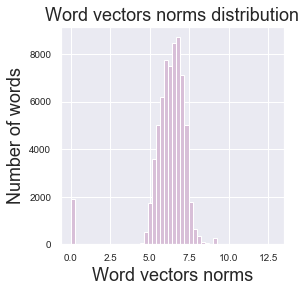

In [40]:
fig, ax = plt.subplots(1, 1, figsize=(4,4))

n, bins, patches = plt.hist(feats['glove_vec300_norm'], 50, density=False, facecolor='thistle')

plt.xlabel('Word vectors norms', fontsize=18)
plt.ylabel('Number of words', fontsize=18)
plt.title('Word vectors norms distribution', fontsize=18)
plt.savefig("word-vectors.pdf", bbox_inches='tight')
plt.show()

C:\Users\shiva\anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


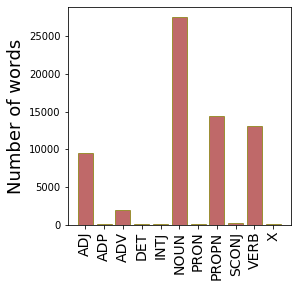

In [22]:
feats_gr_pos = feats.groupby(['pos'])[['sentence']].count()
feats_gr_pos = feats_gr_pos.reset_index()
feats_gr_pos = feats_gr_pos.rename(columns={"sentence": "num"})


fig, ax = plt.subplots(1, 1, figsize=(4,4))

xticklabels = feats_gr_pos.pos

ax.bar(np.arange(len(feats_gr_pos.pos)), feats_gr_pos.num,
        align='center', color='brown', edgecolor='olive', alpha=0.7)
ax.set_xticks(np.arange(len(feats_gr_pos.pos)))
ax.set_xticklabels(xticklabels, rotation=90, fontsize=14)
#ax.set_title('POS tags', fontsize=18)
ax.set_ylabel('Number of words', fontsize=18)
plt.savefig("POS.pdf", bbox_inches='tight')
fig.show()

C:\Users\shiva\anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


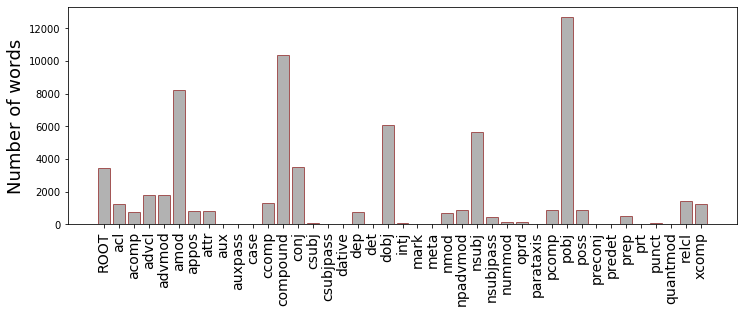

In [17]:
feats_gr_dep = feats.groupby(['dep'])[['sentence']].count()
feats_gr_dep = feats_gr_dep.reset_index()
feats_gr_dep = feats_gr_dep.rename(columns={"sentence": "num"})


fig, ax = plt.subplots(1, 1, figsize=(12,4))

xticklabels = feats_gr_dep.dep

ax.bar(np.arange(len(feats_gr_dep.dep)), feats_gr_dep.num,
        align='center', color='grey', edgecolor='maroon', alpha=0.6)
ax.set_xticks(np.arange(len(feats_gr_dep.dep)))
ax.set_xticklabels(xticklabels, rotation=90, fontsize=14)
#ax.set_title('Syntactic dependences', fontsize=18)
ax.set_ylabel('Number of words', fontsize=18)
plt.savefig("Syntactic.pdf", bbox_inches='tight')
fig.show()

C:\Users\shiva\anaconda3\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


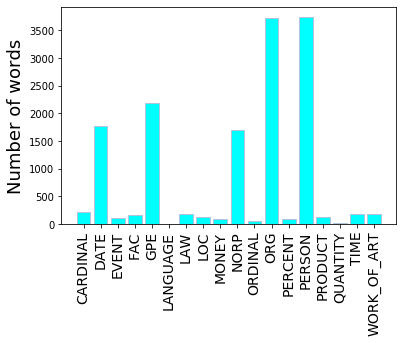

In [23]:
feats['ne_label']

feats_gr_ner = feats.groupby(['ne_label'])[['sentence']].count()
feats_gr_ner = feats_gr_ner.reset_index()
feats_gr_ner = feats_gr_ner.rename(columns={"sentence": "num"})


fig, ax = plt.subplots(1, 1, figsize=(6,4))

xticklabels = feats_gr_ner.ne_label

ax.bar(np.arange(len(feats_gr_ner.ne_label)), feats_gr_ner.num,
        align='center', color='cyan', edgecolor='lightsteelblue')
ax.set_xticks(np.arange(len(feats_gr_ner.ne_label)))
ax.set_xticklabels(xticklabels, rotation=90, fontsize=14)
#ax.set_title('NE types', fontsize=18)
ax.set_ylabel('Number of words', fontsize=18)
plt.savefig("NER.pdf", bbox_inches='tight')
fig.show()

In [5]:
feats_liwc = feats[['affect ',
 'posemo ',
 'negemo ',
 'anx ',
 'anger ',
 'sad ',
 'social ',
 'family ',
 'friend ',
 'female ',
 'male ',
 'cogproc ',
 'insight ',
 'cause ',
 'discrep ',
 'tentat ',
 'certain ',
 'differ ',
 'percept ',
 'see ',
 'hear ',
 'feel ',
 'bio ',
 'body ',
 'health ',
 'sexual ',
 'ingest ',
 'drives ',
 'affiliation ',
 'achieve ',
 'power ',
 'reward ',
 'risk ',
 'focuspast ',
 'focuspresent ',
 'focusfuture ',
 'relativ ',
 'motion ',
 'space ',
 'time ',
 'work ',
 'leisure ',
 'home ',
 'money ',
 'relig ',
 'death ',
 'informal ',
 'swear ',
 'netspeak ',
 'assent ',
 'nonflu ',
 'filler ']]

C:\Users\shiva\anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


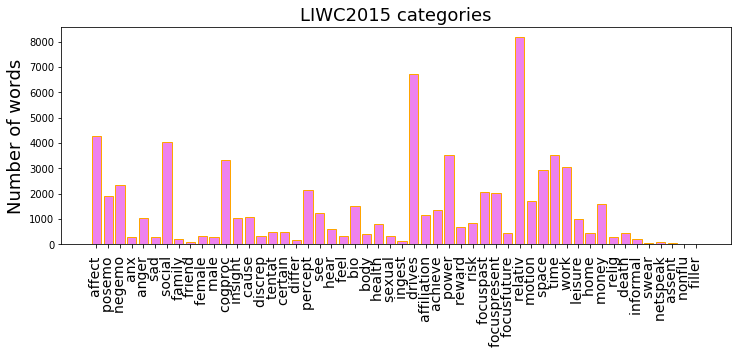

In [11]:
feats_gr_liwc = pd.DataFrame(feats_liwc.sum(axis=0))
feats_gr_liwc = feats_gr_liwc.reset_index()
feats_gr_liwc = feats_gr_liwc.rename(columns={"index":"category", 0:"num"})


fig, ax = plt.subplots(1, 1, figsize=(12,4))

xticklabels = feats_gr_liwc.category

ax.bar(np.arange(len(feats_gr_liwc.category)), feats_gr_liwc.num,
        align='center', color='violet', edgecolor='orange')
ax.set_xticks(np.arange(len(feats_gr_liwc.category)))
ax.set_xticklabels(xticklabels, rotation=90, fontsize=14)
ax.set_title('LIWC2015 categories', fontsize=18)
ax.set_ylabel('Number of words', fontsize=18)
plt.savefig("LIWC.pdf", bbox_inches='tight')
fig.show()

In [13]:
feats_rest = feats[['negative_conc',
 'positive_conc',
 'weak_subj',
 'strong_subj',
 'hyperbolic_terms',
 'attitude_markers',
 'kill_verbs',
 'bias_lexicon',
 'action_verbs',
 'comparative_forms',
 'modal_adverbs',
 'manner_adverbs',
 'superlative_forms',
 'assertive_verbs',
 'factive_verbs',
 'report_verbs',
 'implicative_verbs',
 'hedges',
 'boosters']]

C:\Users\shiva\anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


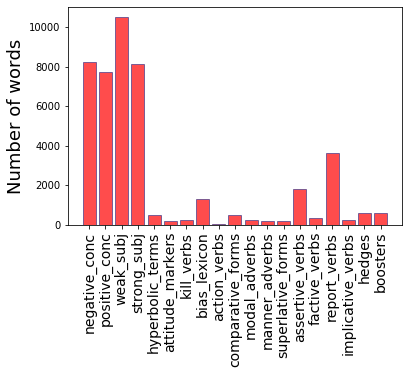

In [15]:
feats_gr_rest = pd.DataFrame(feats_rest.sum(axis=0))
feats_gr_rest = feats_gr_rest.reset_index()
feats_gr_rest = feats_gr_rest.rename(columns={"index":"feature", 0:"num"})


fig, ax = plt.subplots(1, 1, figsize=(6,4))

xticklabels = feats_gr_rest.feature

ax.bar(np.arange(len(feats_gr_rest.feature)), feats_gr_rest.num,
        align='center', color='red', edgecolor='darkslateblue', alpha=0.7)
ax.set_xticks(np.arange(len(feats_gr_rest.feature)))
ax.set_xticklabels(xticklabels, rotation=90, fontsize=14)
#ax.set_title('Dictionaries', fontsize=18)
ax.set_ylabel('Number of words', fontsize=18)
plt.savefig("DICT.pdf",  bbox_inches='tight')
fig.show()

In [48]:
feats_cor = feats[['label4',
 'glove_vec300_norm',
 'tfidf_art',
 'pos_ADJ',
 'pos_ADP',
 'pos_ADV',
 'pos_AUX',
 'pos_DET',
 'pos_INTJ',
 'pos_NOUN',
 'pos_PRON',
 'pos_PROPN',
 'pos_SCONJ',
 'pos_VERB',
 'pos_X',
 'dep_ROOT',
 'dep_acl',
 'dep_acomp',
 'dep_advcl',
 'dep_advmod',
 'dep_agent',
 'dep_amod',
 'dep_appos',
 'dep_attr',
 'dep_aux',
 'dep_auxpass',
 'dep_case',
 'dep_cc',
 'dep_ccomp',
 'dep_compound',
 'dep_conj',
 'dep_csubj',
 'dep_dative',
 'dep_dep',
 'dep_det',
 'dep_dobj',
 'dep_expl',
 'dep_intj',
 'dep_mark',
 #'dep_meta',
 'dep_neg',
 'dep_nmod',
 'dep_npadvmod',
 'dep_nsubj',
 'dep_nsubjpass',
 'dep_nummod',
 'dep_oprd',
 'dep_parataxis',
 'dep_pcomp',
 'dep_pobj',
 'dep_poss',
 'dep_preconj',
 'dep_predet',
 'dep_prep',
 'dep_prt',
 'dep_punct',
 'dep_quantmod',
 'dep_relcl',
 'dep_xcomp',
 'ne_CARDINAL',
 'ne_DATE',
 'ne_EVENT',
 'ne_FAC',
 'ne_GPE',
 'ne_LANGUAGE',
 'ne_LAW',
 'ne_LOC',
 'ne_MONEY',
 'ne_NORP',
 'ne_ORDINAL',
 'ne_ORG',
 'ne_PERCENT',
 'ne_PERSON',
 'ne_PRODUCT',
 'ne_QUANTITY',
 'ne_TIME',
 'ne_WORK_OF_ART',            
 'negative_conc',
 'positive_conc',
 'weak_subj',
 'strong_subj',
 'hyperbolic_terms',
 'attitude_markers',
 'kill_verbs',
 'bias_lexicon',
 'action_verbs',
 'comparative_forms',
 'modal_adverbs',
 'manner_adverbs',
 'superlative_forms',
 'assertive_verbs',
 'factive_verbs',
 'report_verbs',
 'implicative_verbs',
 'hedges',
 'boosters',
 'affect ',
 'posemo ',
 'negemo ',
 'anx ',
 'anger ',
 'sad ',
 'social ',
 'family ',
 'friend ',
 'female ',
 'male ',
 'cogproc ',
 'insight ',
 'cause ',
 'discrep ',
 'tentat ',
 'certain ',
 'differ ',
 'percept ',
 'see ',
 'hear ',
 'feel ',
 'bio ',
 'body ',
 'health ',
 'sexual ',
 'ingest ',
 'drives ',
 'affiliation ',
 'achieve ',
 'power ',
 'reward ',
 'risk ',
 'focuspast ',
 'focuspresent ',
 'focusfuture ',
 'relativ ',
 'motion ',
 'space ',
 'time ',
 'work ',
 'leisure ',
 'home ',
 'money ',
 'relig ',
 'death ',
 'informal ',
 'swear ',
 'netspeak ',
 'assent ',
 'nonflu ',
 'filler ']]

In [49]:
corrMatrix = feats_cor.corr()
corrMatrix = corrMatrix.dropna(axis=1, how='all')
corrMatrix = corrMatrix.dropna(axis=0, how='all')

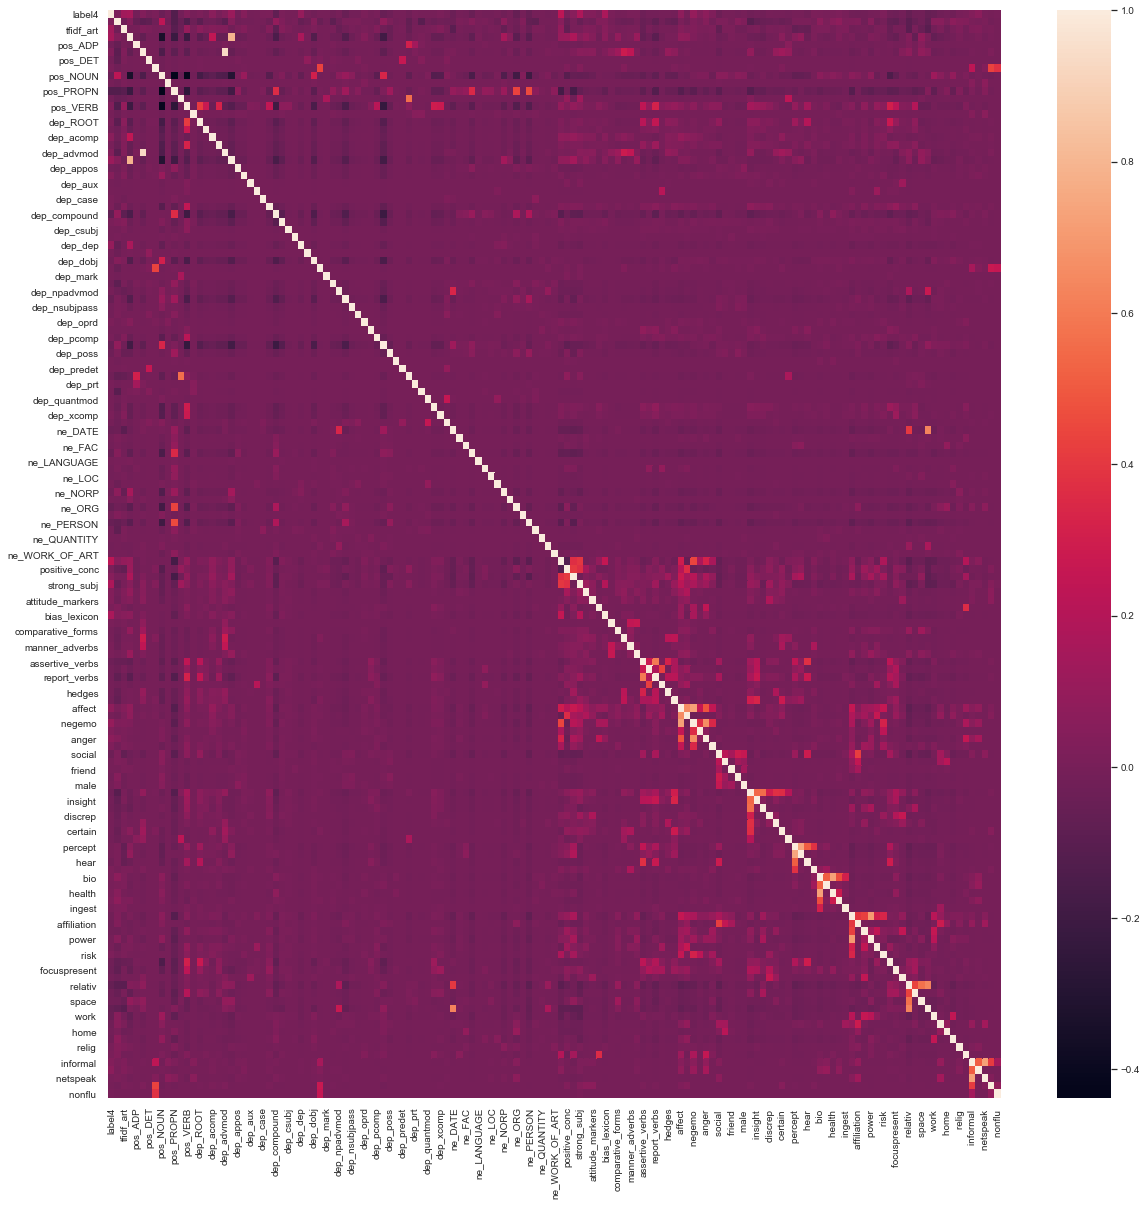

In [50]:
fig, ax = plt.subplots(1, 1, figsize=(20,20))
sn.set(font_scale=0.9)
sn.heatmap(corrMatrix, annot=False)
plt.savefig("corr.pdf")
plt.show()